# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

1. Импорты библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


ModuleNotFoundError: No module named 'pandas'

2. Загрузка датасета

In [3]:
column_names = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]

df = pd.read_csv(r"D:/diabetes.csv", names=column_names, header=None)


3. Размер датасета

In [4]:
df.shape

(768, 9)

4. Первые строки

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


5. Типы данных

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

6. Описание полей

| Field                    | Description              |
| ------------------------ |--------------------------|
| Pregnancies              | количество беременностей |
| Glucose                  | уровень глюкозы в крови  |
| BloodPressure            | диастолическое давление  |
| SkinThickness            | толщина кожной складки   |
| Insulin                  | уровень инсулина         |
| BMI                      | индекс массы тела        |
| DiabetesPedigreeFunction | наследственный риск      |
| Age                      | возраст пациента         |
| Outcome                  | наличие диабета (0 / 1)  |


7. Проверка пропусков

In [7]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

7.Basic statistics

In [8]:
df.describe()
df.mode()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,99,70.0,0.0,0.0,32.0,0.254,22.0,0.0
1,NaN,100,NaN,NaN,NaN,NaN,0.258,NaN,NaN


8. Поиск некорректных нулей (начало очистки)

In [9]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
(df[cols_with_zero] == 0).sum()


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

9. Замена 0 → NaN

In [10]:
df_clean = df.copy()

for col in cols_with_zero:
    df_clean[col] = df_clean[col].replace(0, np.nan)


10. Проверка NaN после замены

In [11]:
df_clean.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

11. Заполнение пропусков медианой

In [12]:
df_clean[cols_with_zero] = df_clean[cols_with_zero].fillna(
    df_clean[cols_with_zero].median()
)


12. Финальная проверка пропусков

In [13]:
df_clean.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

13. Базовая статистика

In [14]:
df_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


14. Мода

In [15]:
df_clean.mode()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,99.0,72.0,29.0,125.0,32.3,0.254,22.0,0.0
1,NaN,100.0,NaN,NaN,NaN,NaN,0.258,NaN,NaN


15. Категориальные данные

In [16]:
df_clean['Outcome'].value_counts()


Outcome
0    500
1    268
Name: count, dtype: int64

16. Bar chart

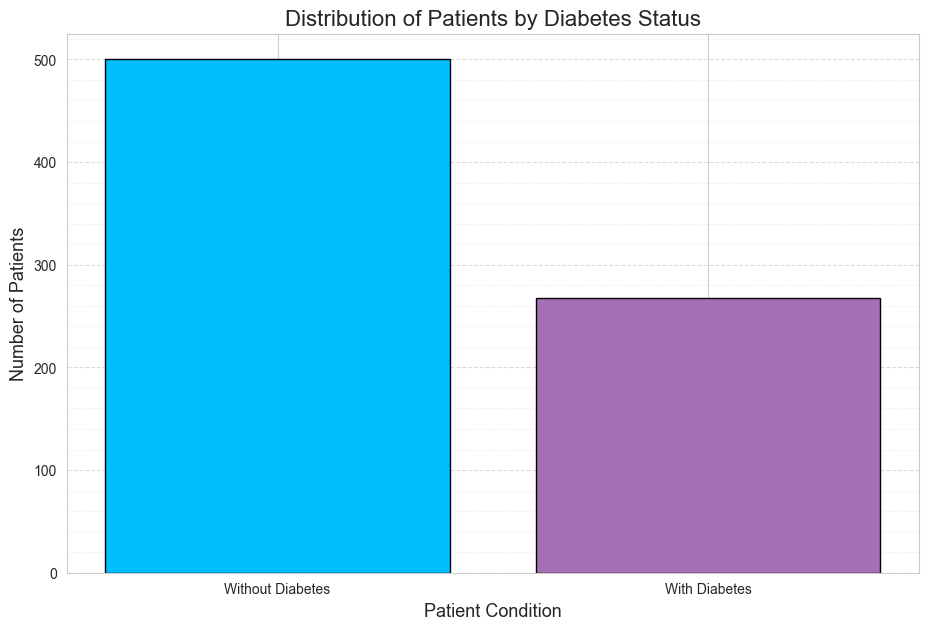

In [21]:
plt.figure(figsize=(11,7), facecolor='white')

counts = df_clean['Outcome_label'].value_counts()

plt.bar(
    counts.index,
    counts.values,
    color=['#00BFFF', '#A66FB5'],
    edgecolor='black'
)

plt.title("Distribution of Patients by Diabetes Status", fontsize=16)
plt.xlabel("Patient Condition", fontsize=13)
plt.ylabel("Number of Patients", fontsize=13)


plt.grid(True, which='major', axis='y', linestyle='--', alpha=0.7)
plt.grid(True, which='minor', axis='y', linestyle=':', alpha=0.4)
plt.minorticks_on()

plt.show()


17. Feature engineering

In [18]:
df_clean['Outcome_label'] = df_clean['Outcome'].map({
    0: 'Without Diabetes',
    1: 'With Diabetes'
})


Table groupby

In [19]:
grouped_means = df_clean.groupby('Outcome_label').mean()

grouped_means = grouped_means.round(2)

grouped_means

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Outcome_label,,,,,,,,,
With Diabetes,4.87,142.13,75.12,31.69,164.70,35.38,0.55,37.07,1.0
Without Diabetes,3.30,110.68,70.92,27.73,127.79,30.89,0.43,31.19,0.0


18. Simple filtering

In [20]:
df_clean[(df_clean['BMI'] > 30) & (df_clean['Age'] > 40)]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_label
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,With Diabetes
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,With Diabetes
9,8,125.0,96.0,29.0,125.0,32.3,0.232,54,1,With Diabetes
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1,With Diabetes
21,8,99.0,84.0,29.0,125.0,35.4,0.388,50,0,Without Diabetes
...,...,...,...,...,...,...,...,...,...,...
757,0,123.0,72.0,29.0,125.0,36.3,0.258,52,1,With Diabetes
759,6,190.0,92.0,29.0,125.0,35.5,0.278,66,1,With Diabetes
761,9,170.0,74.0,31.0,125.0,44.0,0.403,43,1,With Diabetes
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,Without Diabetes


# EDA — Визуализация:

19. Histogram BMI

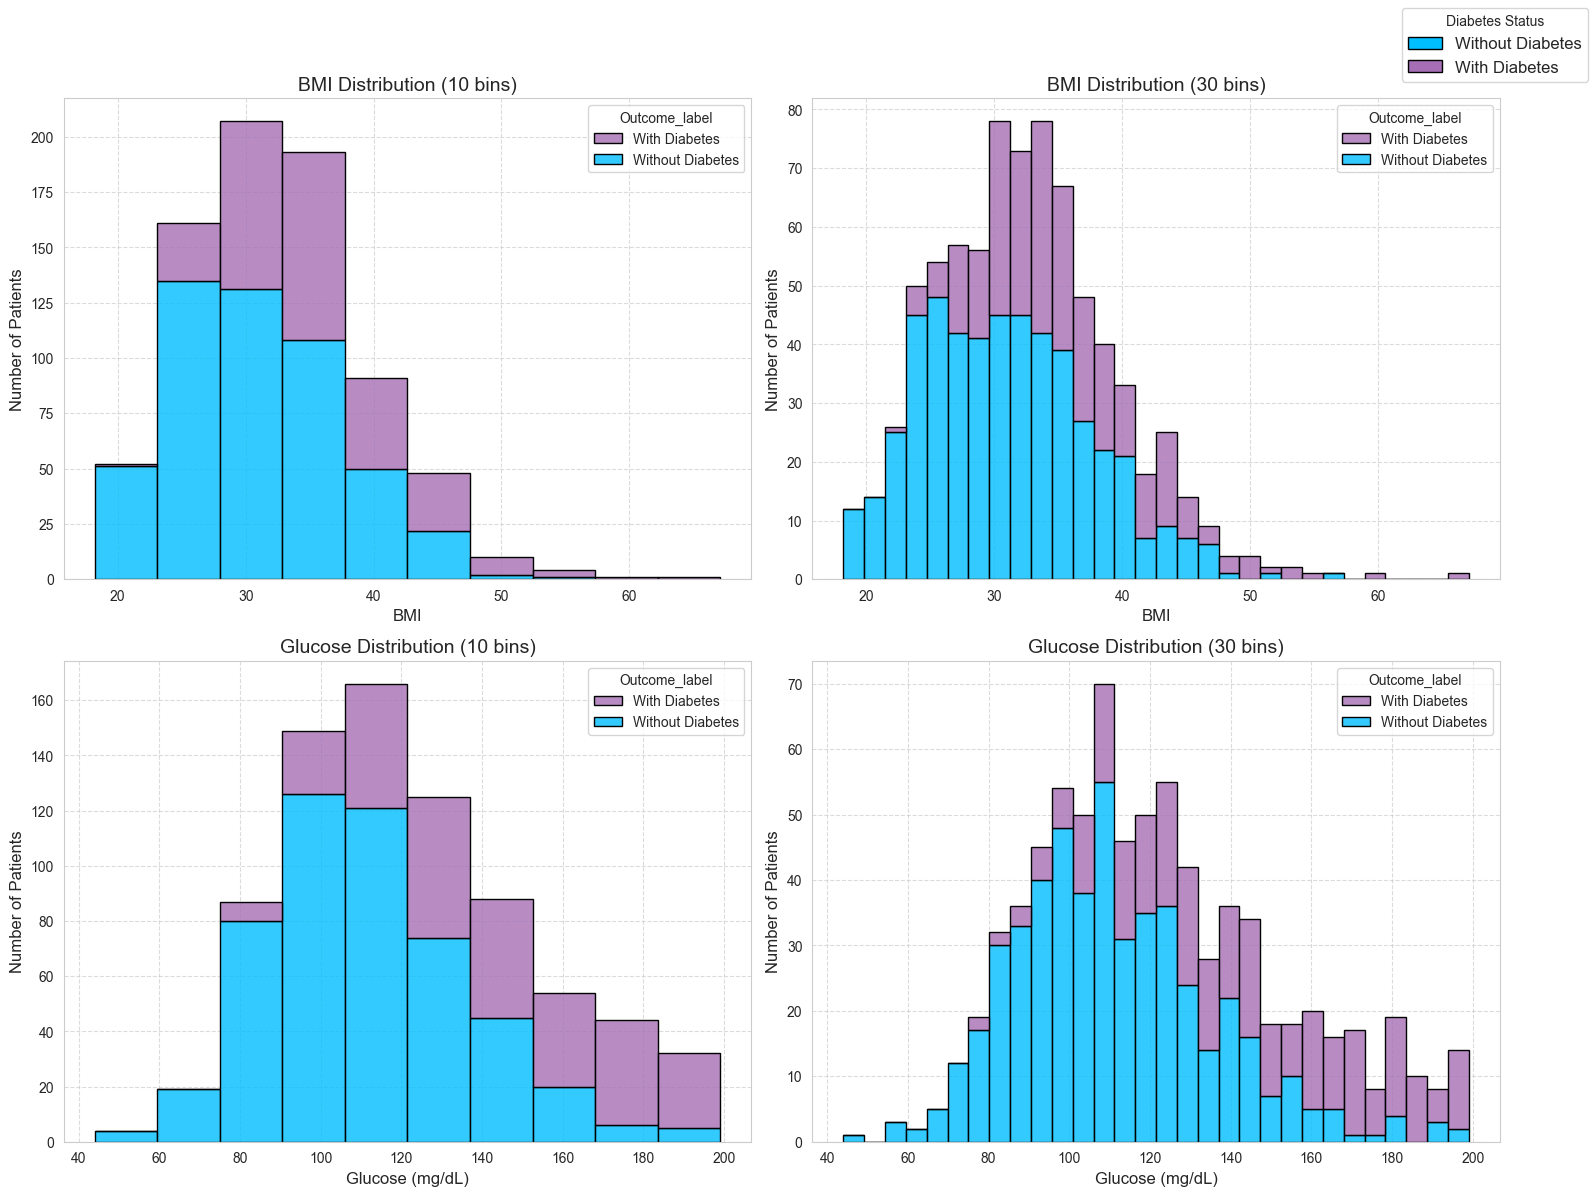

In [22]:
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import seaborn as sns

#BMI и Glucose graphs
fig, axes = plt.subplots(2, 2, figsize=(16,12), facecolor='white')

# 1. BMI, bins=10
sns.histplot(
    data=df_clean,
    x='BMI',
    hue='Outcome_label',
    multiple='stack',
    bins=10,
    palette={'Without Diabetes':'#00BFFF', 'With Diabetes':'#A66FB5'},
    edgecolor='black',
    alpha=0.8,
    ax=axes[0,0]
)
axes[0,0].set_title("BMI Distribution (10 bins)", fontsize=14)
axes[0,0].set_xlabel("BMI", fontsize=12)
axes[0,0].set_ylabel("Number of Patients", fontsize=12)
axes[0,0].grid(True, which='major', linestyle='--', alpha=0.7)
axes[0,0].minorticks_on()

# 2. BMI, bins=30
sns.histplot(
    data=df_clean,
    x='BMI',
    hue='Outcome_label',
    multiple='stack',
    bins=30,
    palette={'Without Diabetes':'#00BFFF', 'With Diabetes':'#A66FB5'},
    edgecolor='black',
    alpha=0.8,
    ax=axes[0,1]
)
axes[0,1].set_title("BMI Distribution (30 bins)", fontsize=14)
axes[0,1].set_xlabel("BMI", fontsize=12)
axes[0,1].set_ylabel("Number of Patients", fontsize=12)
axes[0,1].grid(True, which='major', linestyle='--', alpha=0.7)
axes[0,1].minorticks_on()

# 3. Glucose, bins=10
sns.histplot(
    data=df_clean,
    x='Glucose',
    hue='Outcome_label',
    multiple='stack',
    bins=10,
    palette={'Without Diabetes':'#00BFFF', 'With Diabetes':'#A66FB5'},
    edgecolor='black',
    alpha=0.8,
    ax=axes[1,0]
)
axes[1,0].set_title("Glucose Distribution (10 bins)", fontsize=14)
axes[1,0].set_xlabel("Glucose (mg/dL)", fontsize=12)
axes[1,0].set_ylabel("Number of Patients", fontsize=12)
axes[1,0].grid(True, which='major', linestyle='--', alpha=0.7)
axes[1,0].minorticks_on()

# 4. Glucose, bins=30
sns.histplot(
    data=df_clean,
    x='Glucose',
    hue='Outcome_label',
    multiple='stack',
    bins=30,
    palette={'Without Diabetes':'#00BFFF', 'With Diabetes':'#A66FB5'},
    edgecolor='black',
    alpha=0.8,
    ax=axes[1,1]
)
axes[1,1].set_title("Glucose Distribution (30 bins)", fontsize=14)
axes[1,1].set_xlabel("Glucose (mg/dL)", fontsize=12)
axes[1,1].set_ylabel("Number of Patients", fontsize=12)
axes[1,1].grid(True, which='major', linestyle='--', alpha=0.7)
axes[1,1].minorticks_on()


handles = [Patch(facecolor='#00BFFF', edgecolor='black', label='Without Diabetes'),
           Patch(facecolor='#A66FB5', edgecolor='black', label='With Diabetes')]
fig.legend(handles=handles, title='Diabetes Status', fontsize=12, loc='upper right')

plt.tight_layout(rect=[0,0,0.95,0.95])
plt.show()


Catplot

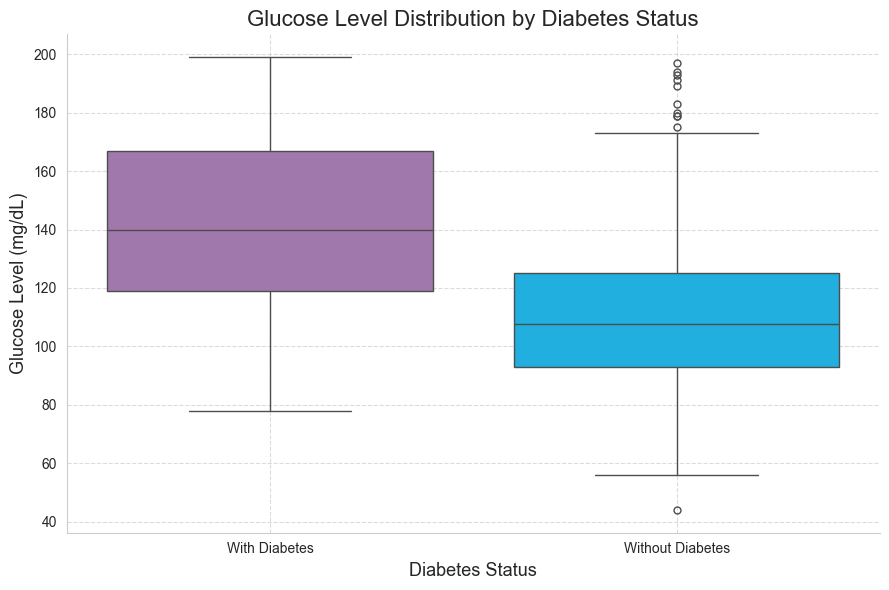

In [37]:
sns.catplot(
    data=df_clean,
    x='Outcome_label',
    y='Glucose',
    kind='box',
    hue='Outcome_label',
    palette={'Without Diabetes': '#00BFFF', 'With Diabetes': '#A66FB5'},
    legend=False,
    height=6,
    aspect=1.5
)
plt.title('Glucose Level Distribution by Diabetes Status', fontsize=16)
plt.xlabel('Diabetes Status', fontsize=13)
plt.ylabel('Glucose Level (mg/dL)', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

20. Boxplot BMI vs Diabetes

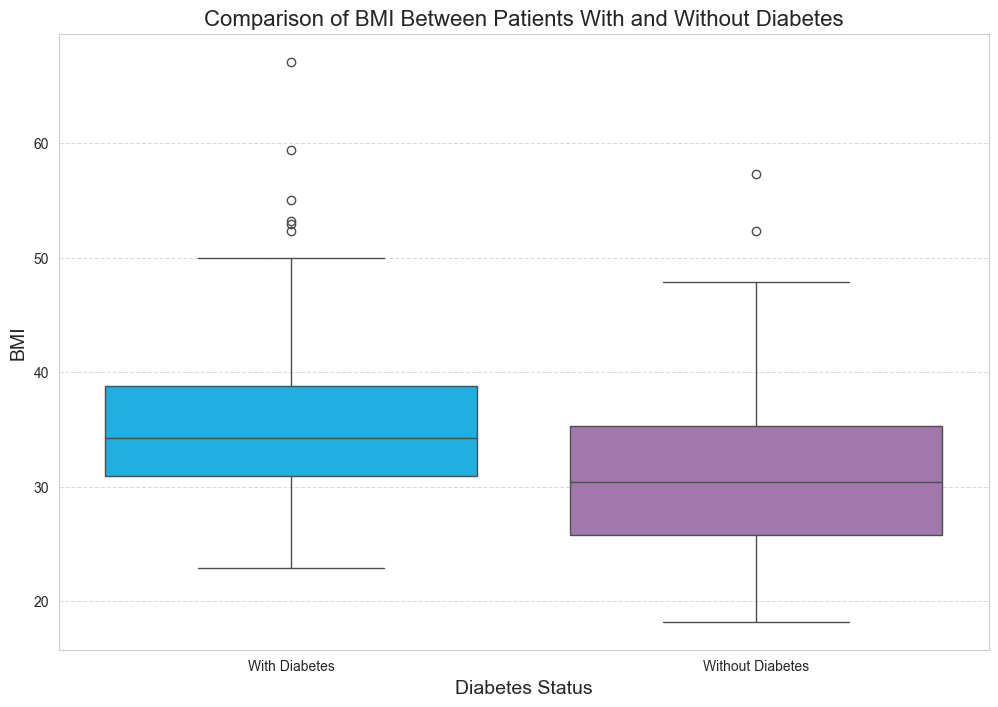

In [24]:
plt.figure(figsize=(12,8), facecolor='white')

sns.boxplot(
    x='Outcome_label',
    y='BMI',
    data=df_clean,
    hue='Outcome_label',
    palette=['#00BFFF', '#A66FB5'],
    legend=False
)

plt.title("Comparison of BMI Between Patients With and Without Diabetes", fontsize=16)
plt.xlabel("Diabetes Status", fontsize=14)
plt.ylabel("BMI", fontsize=14)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.minorticks_on()

plt.show()


21. Boxplot Glucose vs Diabetes

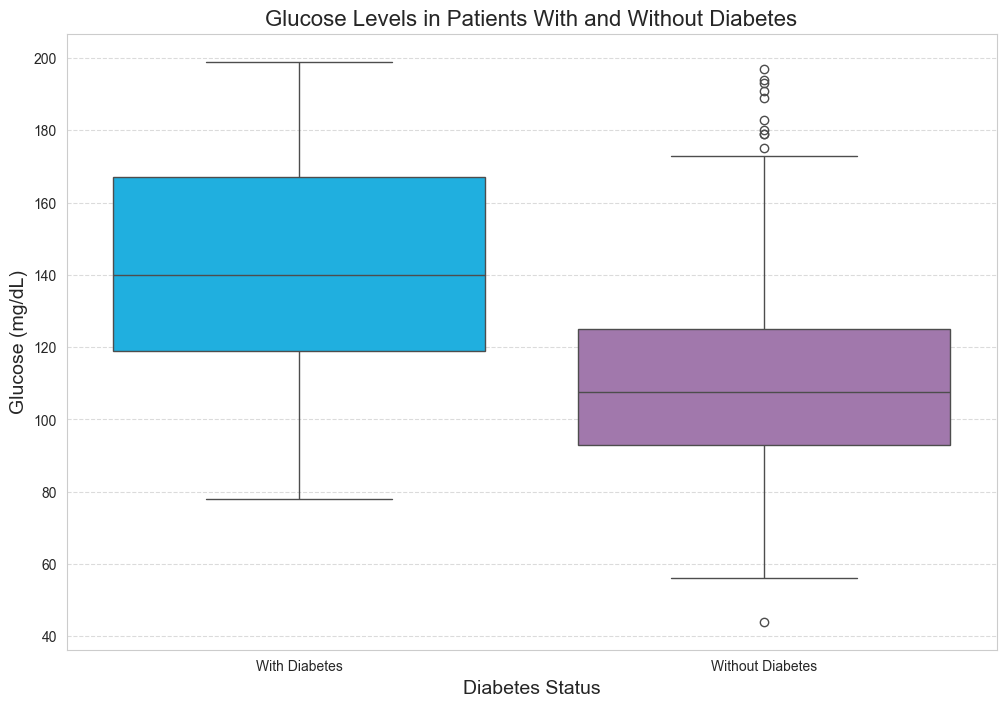

In [26]:
plt.figure(figsize=(12,8), facecolor='white')

sns.boxplot(
    x='Outcome_label',
    y='Glucose',
    data=df_clean,
    hue='Outcome_label',
    palette=['#00BFFF', '#A66FB5'],
    legend=False
)

plt.title("Glucose Levels in Patients With and Without Diabetes", fontsize=16)
plt.xlabel("Diabetes Status", fontsize=14)
plt.ylabel("Glucose (mg/dL)", fontsize=14)


plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.minorticks_on()

plt.show()


22. Violin plot BMI

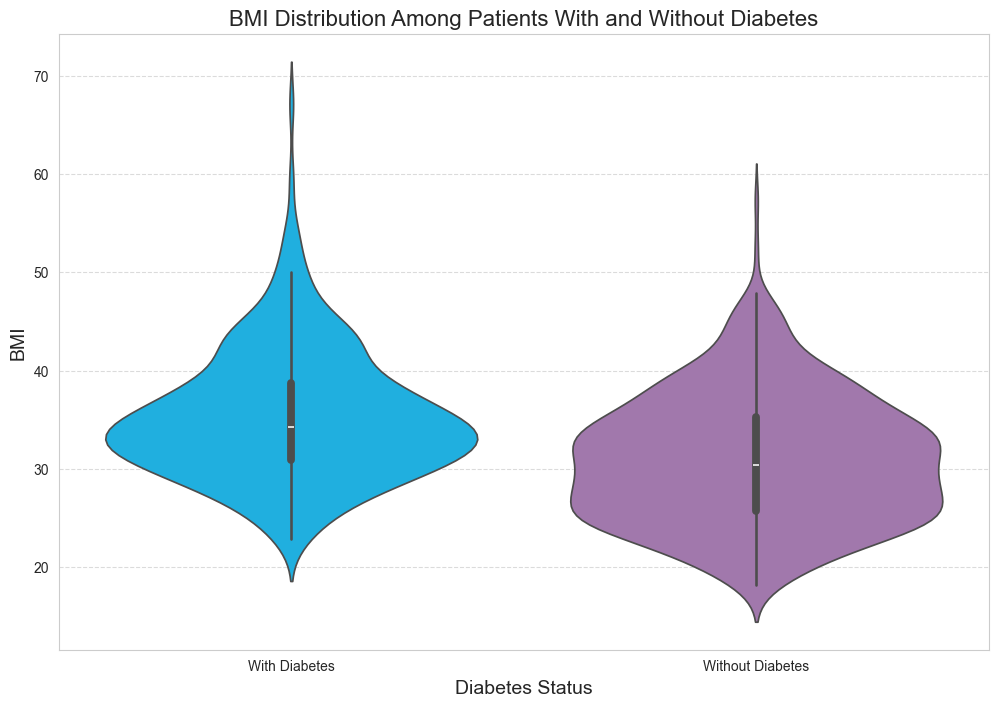

In [27]:
plt.figure(figsize=(12,8), facecolor='white')

sns.violinplot(
    x='Outcome_label',
    y='BMI',
    data=df_clean,
    hue='Outcome_label',
    palette=['#00BFFF', '#A66FB5'],
    legend=False
)

plt.title("BMI Distribution Among Patients With and Without Diabetes", fontsize=16)
plt.xlabel("Diabetes Status", fontsize=14)
plt.ylabel("BMI", fontsize=14)


plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.minorticks_on()

plt.show()


23. Violin plot Glucose

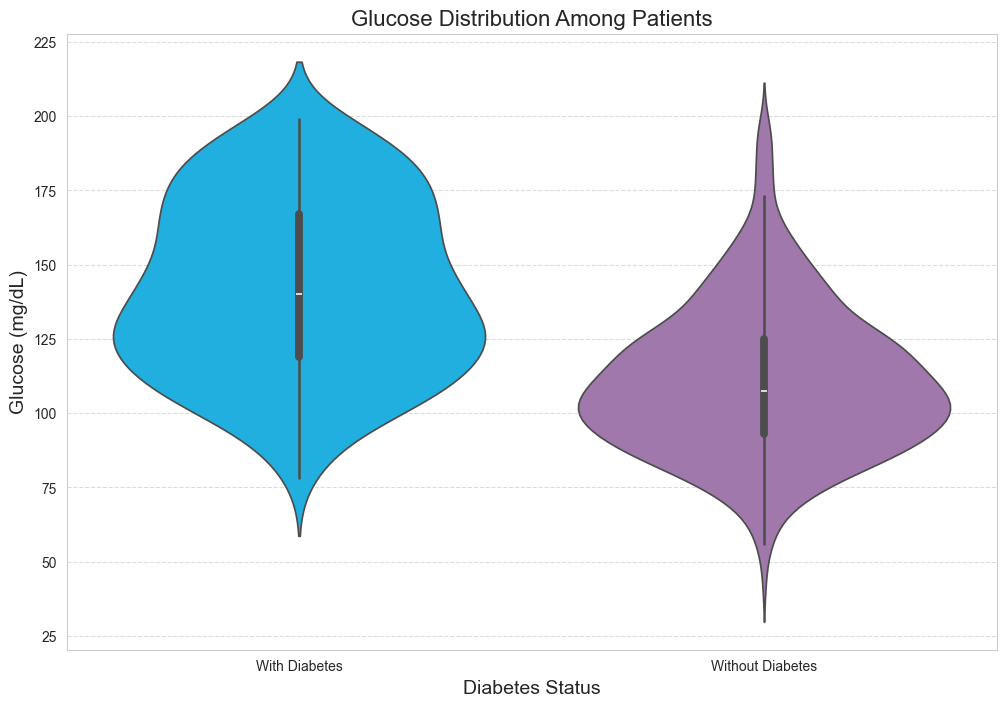

In [28]:
plt.figure(figsize=(12,8), facecolor='white')

sns.violinplot(
    x='Outcome_label',
    y='Glucose',
    data=df_clean,
    hue='Outcome_label',
    palette=['#00BFFF', '#A66FB5'],
    legend=False
)

plt.title("Glucose Distribution Among Patients", fontsize=16)
plt.xlabel("Diabetes Status", fontsize=14)
plt.ylabel("Glucose (mg/dL)", fontsize=14)


plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.minorticks_on()

plt.show()


24. Scatter plot

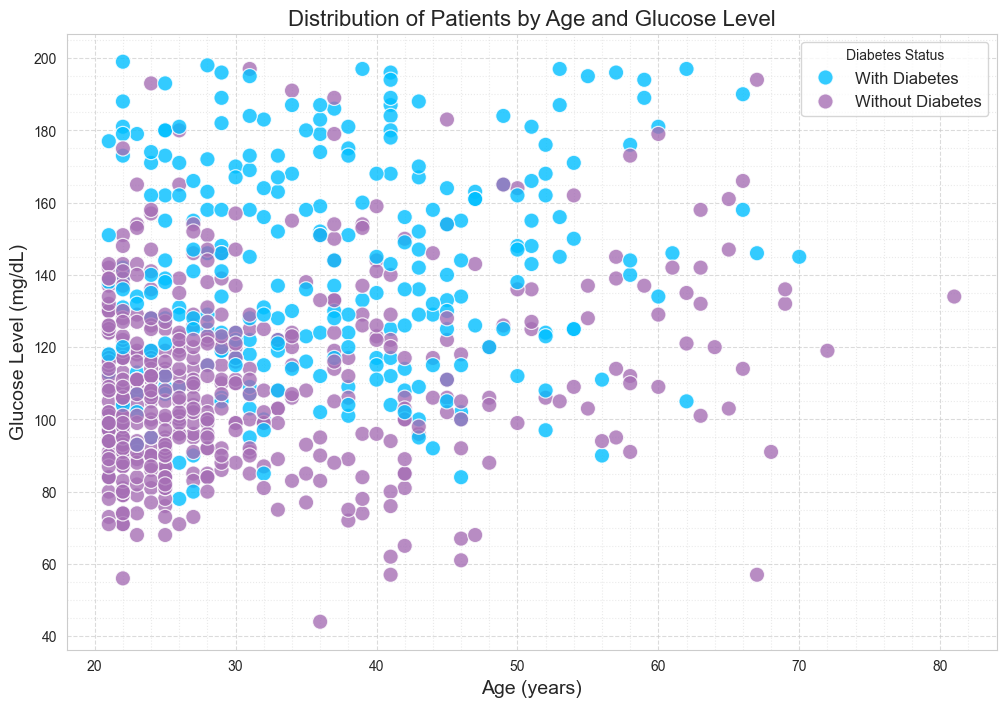

In [29]:
plt.figure(figsize=(12,8), facecolor='white')

sns.scatterplot(
    data=df_clean,
    x='Age',
    y='Glucose',
    hue='Outcome_label',
    palette=['#00BFFF', '#A66FB5'],
    s=120,
    edgecolor='white',
    alpha=0.8
)

plt.title("Distribution of Patients by Age and Glucose Level", fontsize=16)
plt.xlabel("Age (years)", fontsize=14)
plt.ylabel("Glucose Level (mg/dL)", fontsize=14)
plt.legend(title="Diabetes Status", fontsize=12)


plt.grid(True, which='major', linestyle='--', alpha=0.7)
plt.grid(True, which='minor', linestyle=':', alpha=0.4)
plt.minorticks_on()

plt.show()


25. Correlation matrix

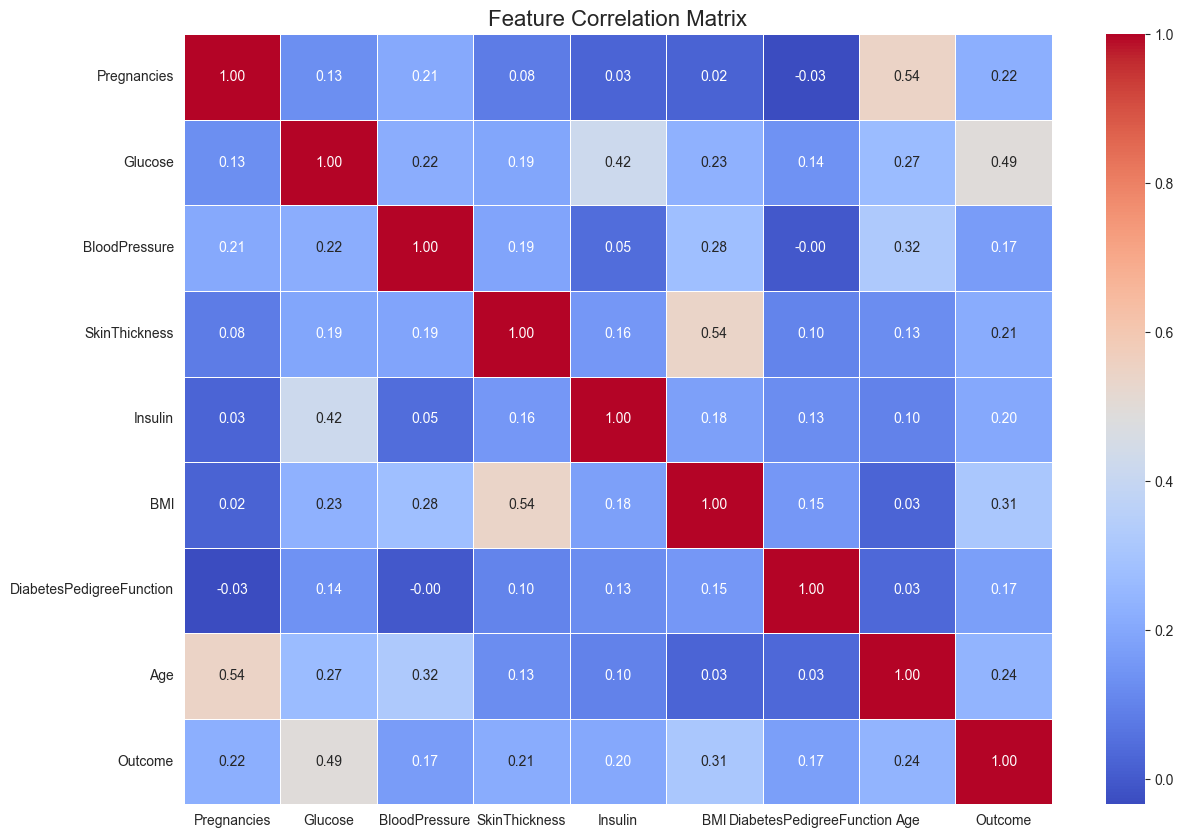

In [30]:
plt.figure(figsize=(14,10), facecolor='white')

corr = df_clean.select_dtypes(include='number').corr()

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5
)

plt.title("Feature Correlation Matrix", fontsize=16)
plt.show()


# Проверка гипотез:

26.Test hypothesis: Glucose levels are higher in patients with diabetes

In [31]:
t_glucose = stats.ttest_ind(
    df_clean[df_clean['Outcome'] == 0]['Glucose'],
    df_clean[df_clean['Outcome'] == 1]['Glucose']
)
print("Glucose levels (t-test):")
print(f"t-statistic = {t_glucose.statistic:.4f}, p-value = {t_glucose.pvalue:.10f}")
print("HYPOTHESIS SUPPORTED" if t_glucose.pvalue < 0.05 else "HYPOTHESIS REJECTED")


TtestResult(statistic=np.float64(-9.09006441398665), pvalue=np.float64(8.336902677508873e-19), df=np.float64(766.0))

27. Test hypothesis: BMI is higher in patients with diabetes

In [32]:
t_bmi = stats.ttest_ind(
    df_clean[df_clean['Outcome'] == 0]['BMI'],
    df_clean[df_clean['Outcome'] == 1]['BMI']
)
print("\nBMI (t-test):")
print(f"t-statistic = {t_bmi.statistic:.4f}, p-value = {t_bmi.pvalue:.10f}")
print("HYPOTHESIS SUPPORTED" if t_bmi.pvalue < 0.05 else "HYPOTHESIS REJECTED")

TtestResult(statistic=np.float64(-15.673795182294105), pvalue=np.float64(3.128719041842255e-48), df=np.float64(766.0))

28. Test hypothesis: Age affects diabetes probability

In [28]:
t_age = stats.ttest_ind(
    df_clean[df_clean['Outcome'] == 0]['Age'],
    df_clean[df_clean['Outcome'] == 1]['Age']
)
print("\nAge (t-test):")
print(f"t-statistic = {t_age.statistic:.4f}, p-value = {t_age.pvalue:.10f}")
print("HYPOTHESIS SUPPORTED" if t_age.pvalue < 0.05 else "HYPOTHESIS REJECTED")

Chi2ContingencyResult(statistic=np.float64(61.77010214954925), pvalue=np.float64(3.85990800418898e-15), dof=1, expected_freq=array([[190.10416667, 309.89583333],
       [101.89583333, 166.10416667]]))

29. Test hypothesis: Number of pregnancies is related to diabetes

In [ ]:
t_pregnancies = stats.ttest_ind(
    df_clean[df_clean['Outcome'] == 0]['Pregnancies'],
    df_clean[df_clean['Outcome'] == 1]['Pregnancies']
)
print("\nPregnancies (t-test):")
print(f"t-statistic = {t_pregnancies.statistic:.4f}, p-value = {t_pregnancies.pvalue:.10f}")
print("HYPOTHESIS SUPPORTED" if t_pregnancies.pvalue < 0.05 else "HYPOTHESIS REJECTED")

30. ANOVA

In [27]:
stats.f_oneway(
    df_clean[df_clean['Outcome'] == 0]['Glucose'],
    df_clean[df_clean['Outcome'] == 1]['Glucose']
)


F_onewayResult(statistic=np.float64(245.66785541650597), pvalue=np.float64(3.128719041842139e-48))

# MULTIDIMENSIONAL ANALYSIS

30. Feature scaling

In [39]:
X = df_clean.select_dtypes(include='number').drop(columns=['Outcome'])
X_scaled = StandardScaler().fit_transform(X)


31. PCA (90%)

In [40]:
pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(X_scaled)


32. KMeans clustering

In [41]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca)


33. Визуализация кластеров

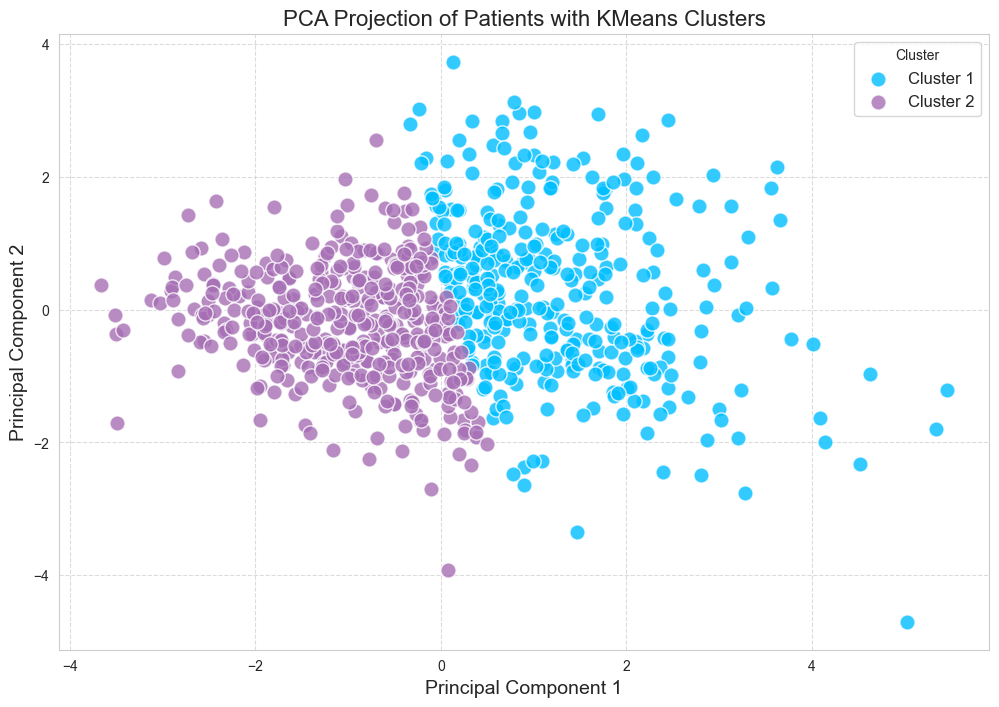

In [25]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


features = ['Glucose', 'BMI', 'Age', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction']

X = df_clean[features].values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca)


cluster_colors = ['#00BFFF', '#A66FB5']

plt.figure(figsize=(12,8), facecolor='white')

for cluster_id in range(2):
    plt.scatter(
        X_pca[clusters == cluster_id, 0],
        X_pca[clusters == cluster_id, 1],
        s=120,
        color=cluster_colors[cluster_id],
        edgecolor='white',
        alpha=0.8,
        label=f'Cluster {cluster_id+1}'
    )

plt.title("PCA Projection of Patients with KMeans Clusters", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)
plt.minorticks_on()

plt.legend(title="Cluster", fontsize=12, loc='upper right')
plt.show()


# PREDICTION

34. Logistic Regression

In [26]:
X = df_clean.drop(columns=['Outcome', 'Outcome_label'])
y = df_clean['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.92      0.86       101
           1       0.79      0.58      0.67        53

    accuracy                           0.81       154
   macro avg       0.80      0.75      0.77       154
weighted avg       0.80      0.81      0.80       154

